In [45]:
import re
output_dir = "\analysis"


In [46]:
# Read the log.mv file and print its contents
with open('log.yPlus', 'r') as file:
    log_contents = file.read()

print(log_contents)

/*---------------------------------------------------------------------------*\
| =========                 |                                                 |
| \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox           |
|  \\    /   O peration     | Version:  2406                                  |
|   \\  /    A nd           | Website:  www.openfoam.com                      |
|    \\/     M anipulation  |                                                 |
\*---------------------------------------------------------------------------*/
Build  : 630d60de3b-20240620 OPENFOAM=2406 version=v2406
Arch   : "LSB;label=32;scalar=64"
Exec   : overInterDyMFoam -postProcess -func yPlus
Date   : Feb 11 2025
Time   : 12:01:41
Host   : Coastal-song
PID    : 16809
I/O    : uncollated
Case   : /home/song/OpenFOAM/song-v2406/run/pukyung_0124_9/background
nProcs : 1
trapFpe: Floating point exception trapping enabled (FOAM_SIGFPE).
fileModificationChecking : Monitoring run-time modified

yPlus data saved to yPlus_data.csv


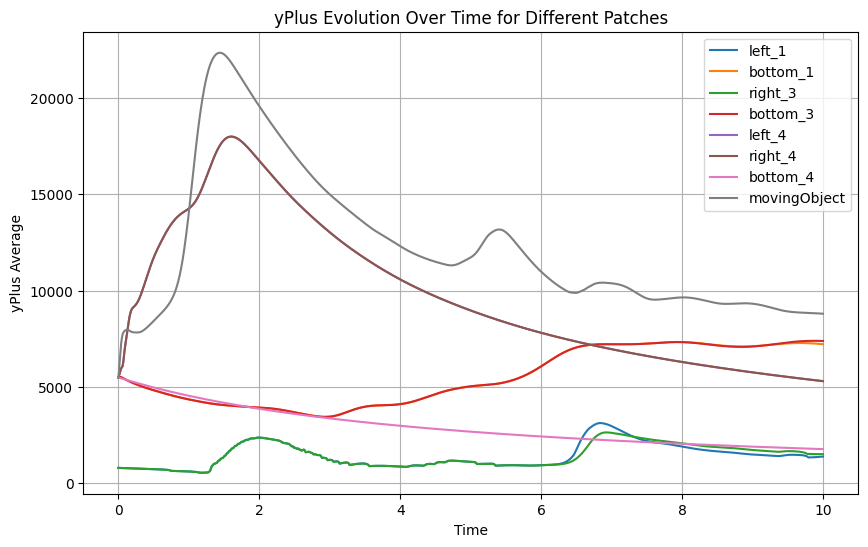

In [47]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Define file path
log_yPlus_path = "log.yPlus"  # Update with your actual path

# Read log file
with open(log_yPlus_path, 'r') as file:
    log_data = file.readlines()

# Extract time and yPlus values for different patches
time_steps = []
patch_data = {}
current_time = None

patch_pattern = re.compile(r'patch (\S+) y\+ : min = ([\d\.]+), max = ([\d\.]+), average = ([\d\.]+)')

for line in log_data:
    time_match = re.match(r"Time = ([0-9.eE+-]+)", line)
    if time_match:
        current_time = float(time_match.group(1))
        if current_time not in time_steps:
            time_steps.append(current_time)
    else:
        patch_match = patch_pattern.search(line)
        if patch_match and current_time is not None:
            patch_name = patch_match.group(1)
            yplus_avg = float(patch_match.group(4))
            
            if patch_name not in patch_data:
                patch_data[patch_name] = []
            patch_data[patch_name].append((current_time, yplus_avg))

# Convert to DataFrame
df_list = []
for patch, values in patch_data.items():
    df = pd.DataFrame(values, columns=["Time", "yPlus"])
    df["Patch"] = patch
    df_list.append(df)

df_yplus = pd.concat(df_list, ignore_index=True)

# Save to CSV
df_yplus.to_csv("yPlus_data.csv", index=False)
print("yPlus data saved to yPlus_data.csv")

# Plot yPlus values over time for each patch
plt.figure(figsize=(10, 6))
for patch in patch_data:
    df_patch = df_yplus[df_yplus["Patch"] == patch]
    plt.plot(df_patch["Time"], df_patch["yPlus"], label=patch)

plt.xlabel("Time")
plt.ylabel("yPlus Average")
plt.title("yPlus Evolution Over Time for Different Patches")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [48]:
import matplotlib.pyplot as plt

# Plot the extracted values
plt.figure(figsize=(10, 6))

plt.scatter(range(len(nCells_values)), nCells_values, label='nCells', marker='.')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'nCells_values' is not defined

<Figure size 1000x600 with 0 Axes>

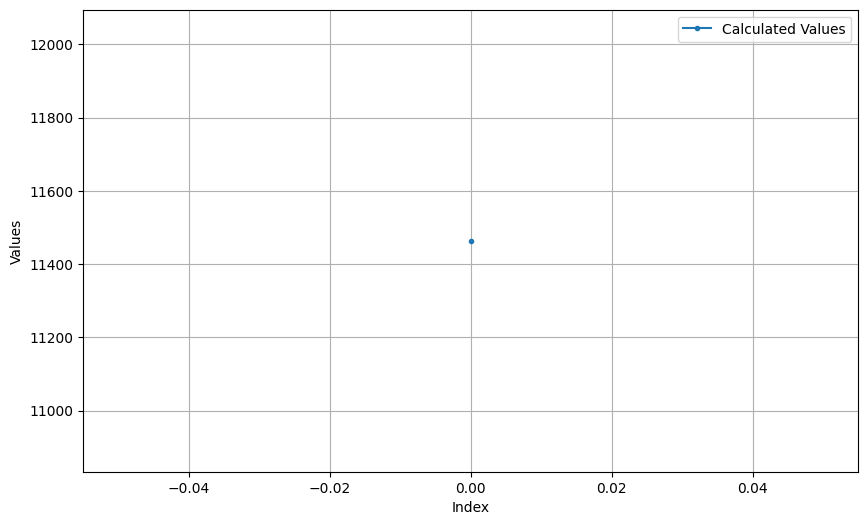

Max calculated value: 11464.0
Min calculated value: 11464.0


In [ ]:
import matplotlib.pyplot as plt

# Plot the extracted values
plt.figure(figsize=(10, 6))

plt.plot(calculated_values, label='Calculated Values', marker='.')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()
print("Max calculated value:", max(calculated_values))
print("Min calculated value:", min(calculated_values))
#save the plot at folder /images/dynamicMovementsCalculated.png
plt.savefig('analysis/dynamicMovementsCalculated.png')
plt.close()

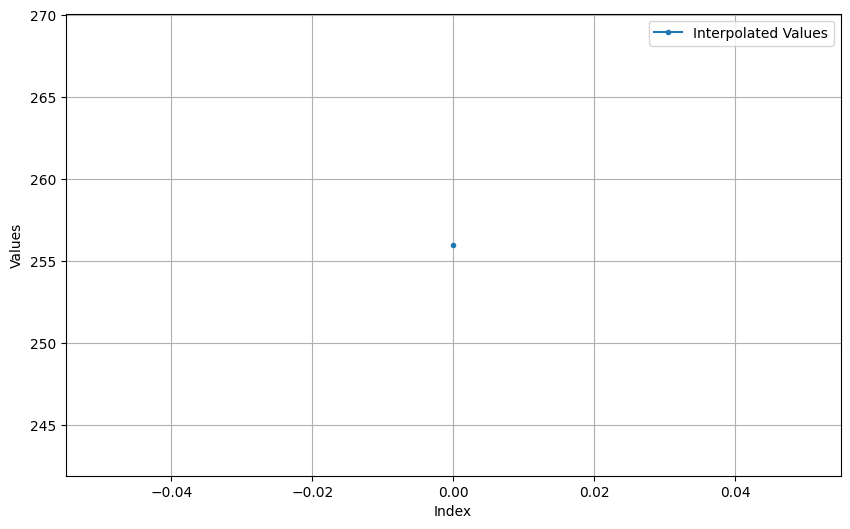

Max calculated value: 256.0
Min calculated value: 256.0


<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the extracted values
plt.figure(figsize=(10, 6))

plt.plot(interpolated_values, label='Interpolated Values', marker='.')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()
print("Max calculated value:", max(interpolated_values))
print("Min calculated value:", min(interpolated_values))
#save the plot at folder /images/dynamicMovementsInterpolated.png
plt.savefig('analysis/dynamicMovementsInterpolated.png')

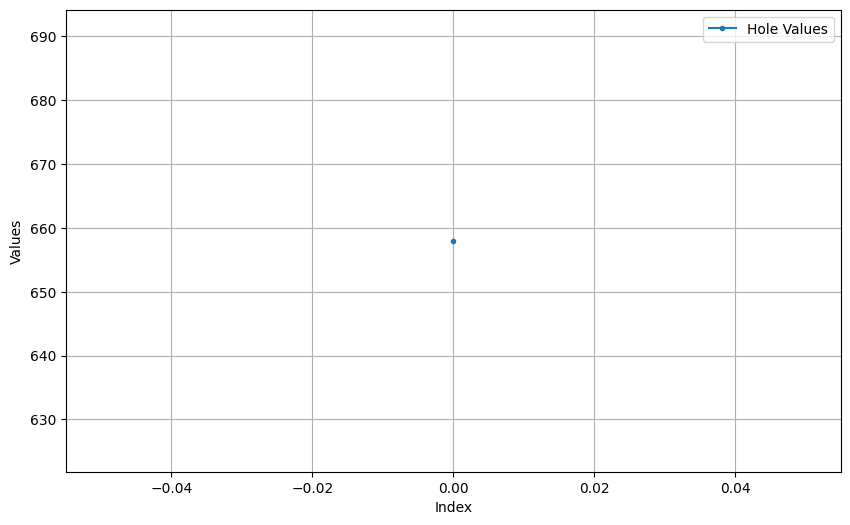

Max calculated value: 658.0
Min calculated value: 658.0


<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the extracted values
plt.figure(figsize=(10, 6))

plt.plot(hole_values, label='Hole Values', marker='.')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()
# show max and min values
print("Max calculated value:", max(hole_values))
print("Min calculated value:", min(hole_values))
#save the plot at folder /images/dynamicMovementsHoles.png
plt.savefig('analysis/dynamicMovementsHoles.png')